In [4]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import os

from flask import Flask

In [5]:
#!pip install flask


In [6]:
# conda install -c anaconda pandas
# conda install -c conda-forge matplotlib

# FLASK
# pip install virtualenv
# pip install flask[async]

# EXECUTE FLASK APP
# export FLASK_APP=app.py
# python -m flask run

In [7]:
# functions

def get_sort(sort):
    if sort=="Ascending":
        return True
    elif sort=="Descending":
        return False

def get_df_stat(text_stat):
    """
    Returns the column name used in the dataframe,
    considering the text for the stat
    """
    stat = text_stat.split()[0]
    if stat!="Minutes":
        return f"{stat}PG"
    else:
        return "MPG"
    
def generate_graph_image(stat, sort, limit):
    stat_selected = get_df_stat(stat) 
    df_sorted = df_nba.sort_values(stat_selected, ascending=get_sort(sort))[:int(limit)]
    ax = df_sorted.plot.bar(x='FULL NAME', y=stat_selected, rot=90)

    # Saved in the same folder
    plt.savefig('saved_figure.png', bbox_inches='tight')
    


In [8]:
csv_path = os.path.join(os.getcwd(), "NBA2021.csv")
with open(csv_path, "r") as csv_file:
    df_nba = pd.read_csv(csv_file)


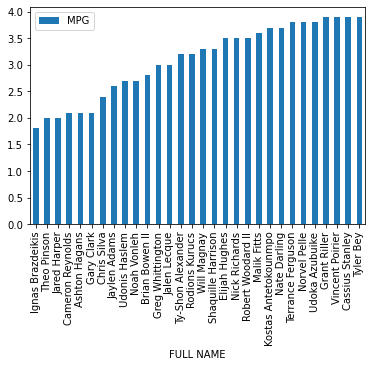

In [9]:
# input for the graph
stat = "Minutes per Game"
sort = "Ascending" # not to consider 0 when we are ascending maybe
limit = "30"
generate_graph_image(stat, sort, limit)

In [12]:
app = Flask(__name__)

@app.route('/')
def hello_world():
    return 'Hello, World!'